In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir ='/content/drive/MyDrive/DATASET AI/train'
val_dir='/content/drive/MyDrive/DATASET AI/val'
test_dir='/content/drive/MyDrive/DATASET AI/test'

FileNotFoundError: ignored

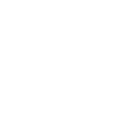

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/1615455264112.jpg")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/1615455264156.jpg")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/1615455264212.jpg")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/1615455264273.jpg")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/1615455264641.jpg")
plt.imshow(img)

sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/1615455264641.jpg")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/aug-image-_0_3007.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/aug-image-_0_3072.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/aug-image-_0_4150.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/train/cordana/aug-image-_0_679.jpeg")
plt.imshow(img)

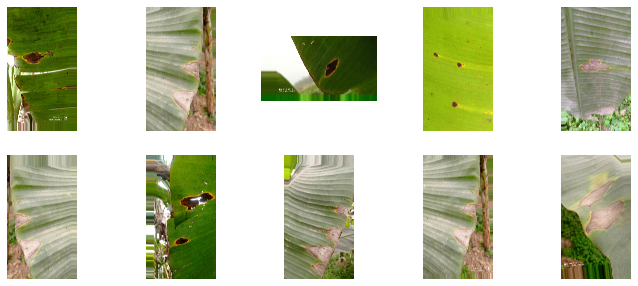

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_9678.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_3982.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_289.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_2893.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_3032.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_396.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_6648.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_8305.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_8338.jpeg")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/DATASET AI/val/cordana/aug-image-_0_9092.jpeg")
plt.imshow(img)

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples=get_files(val_dir)
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(val_samples,"Validation images")
print(test_samples,"Test images")

4 Classes
777 Train images
80 Validation images
80 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
width,height =256,256
input_shape=(width,height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(width,height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(val_dir,shuffle=True,
                                                   target_size=(width,height),
                                                   batch_size=batch_size)

Found 777 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'cordana': 0, 'healthy': 1, 'pestalotiopsis': 2, 'sigatoka': 3}

In [ ]:
# CNN building.

model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


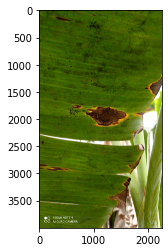

In [ ]:
# Take one image to visualize it's changes after every layer

from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/DATASET AI/train/cordana/1615455264112.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/DATASET AI/train/cordana/1615455264112.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [ ]:
#'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2'
# Visualizing output after every layer.

from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

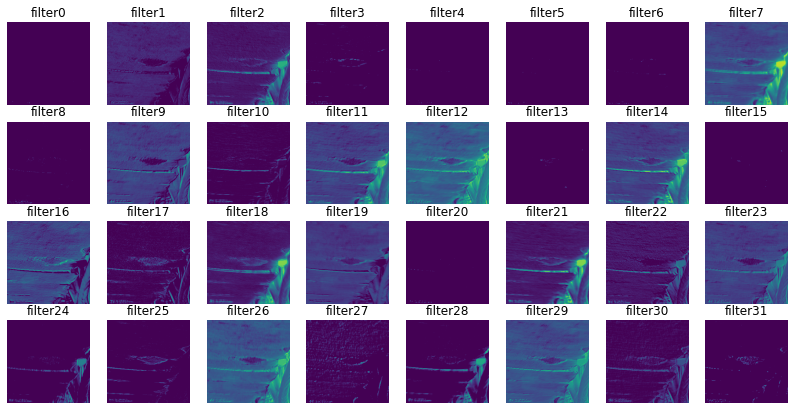

In [ ]:
#conv2d_1_features
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

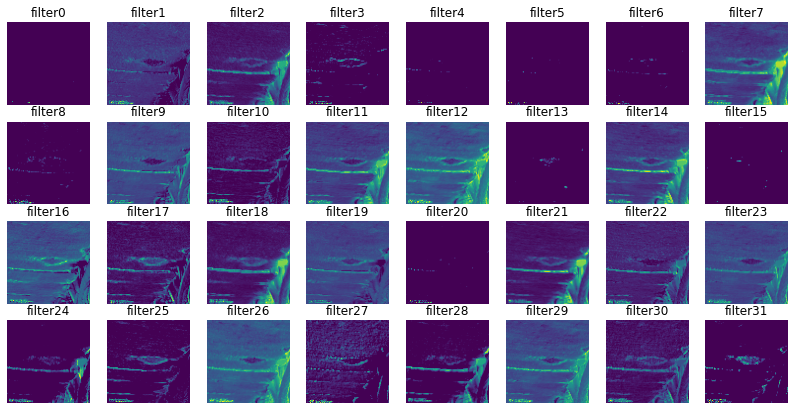

In [ ]:
#max_pooling2d_1_features

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

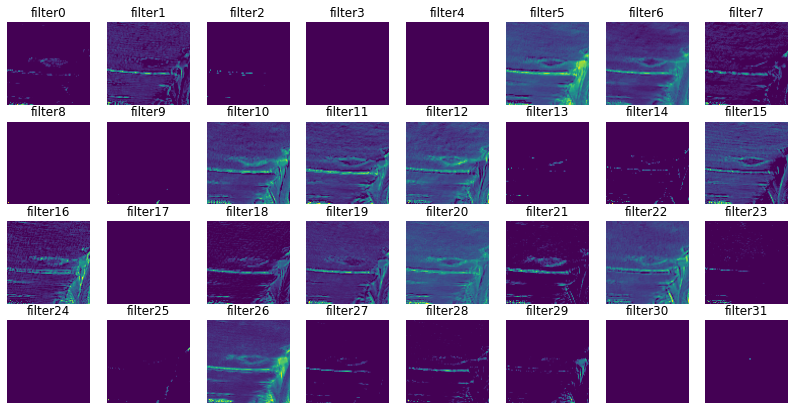

In [ ]:
#conv2d_2_features

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

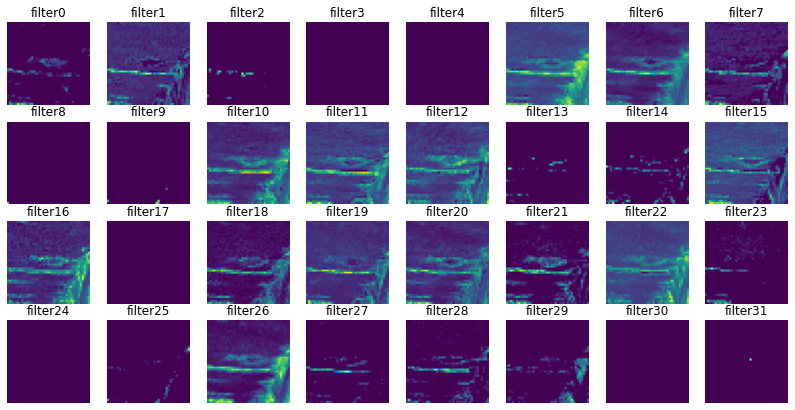

In [ ]:
# max_pooling2d_2_features

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

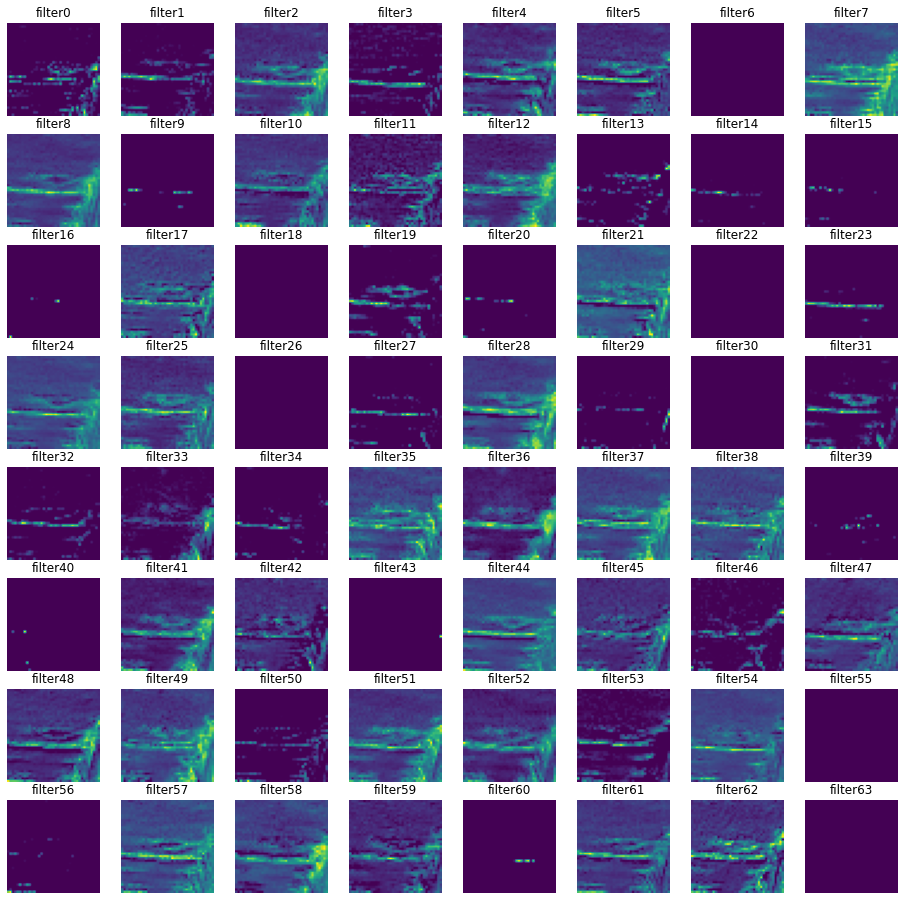

In [ ]:
# conv2d_3_features

fig=plt.figure(figsize=(16,16))
columns =8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

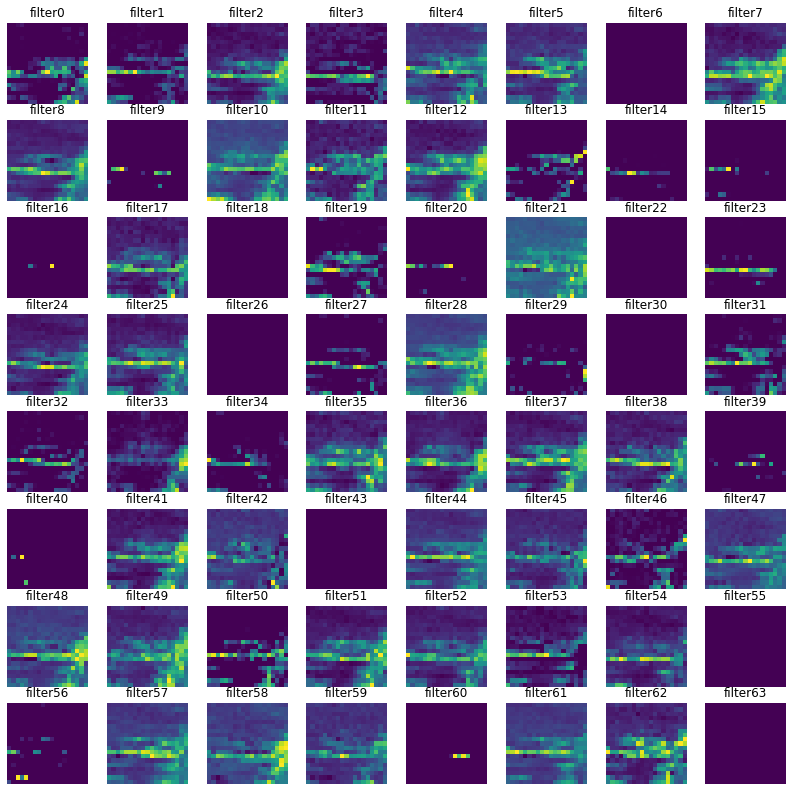

In [ ]:
#max_pooling2d_3_features

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(height, width),
    batch_size=batch_size)

Found 777 images belonging to 4 classes.


In [ ]:
import keras
from keras.optimizer_v2.adam import Adam as Adam
import tensorflow as tf

In [ ]:
# Model building to get trained with parameters.
opt= tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])  #config the model with losses and metrics with model.compile()
train=model.fit_generator(train_generator,
                          epochs=15,
                          #steps_per_epoch=100,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                        verbose=1)

FileNotFoundError: ignored

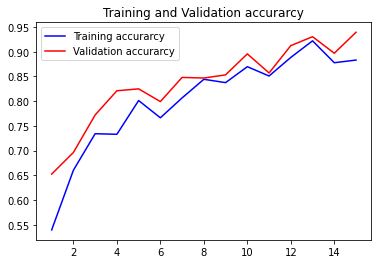

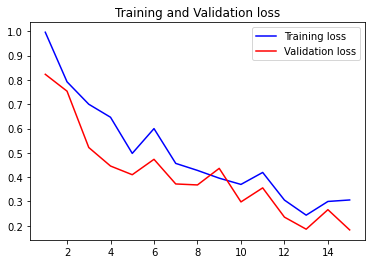

In [ ]:
from keras.callbacks import History
#history = History()

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

3/3 [==============================] - 40s 16s/step - loss: 0.5321 - accuracy: 0.8500
Test score is 0.5321335196495056
Test accuracy is 0.8500000238418579


In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
classes = train_generator.class_indices
classes

{'cordana': 0, 'healthy': 1, 'pestalotiopsis': 2, 'sigatoka': 3}

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["cordana", "healthy", "pestalotiopsis", "sigatoka"]

TypeError: ignored

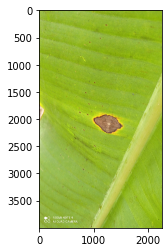

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


result = model.predict([prepare('/content/drive/MyDrive/DATASET AI/test/cordana/1615455263756.jpg')])
disease = image.load_img('/content/drive/MyDrive/DATASET AI/test/cordana/1615455263756.jpg')
plt.imshow(disease)
print (Classes[int(result)])

TypeError: ignored

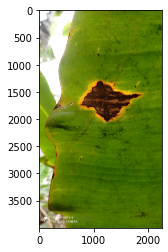

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


result = model.predict([prepare('/content/drive/MyDrive/DATASET AI/test/cordana/1615455263771.jpg')])
disease = image.load_img('/content/drive/MyDrive/DATASET AI/test/cordana/1615455263771.jpg')
plt.imshow(disease)
print (Classes[int(result)])

Saving IMG_20210312_175340.jpg to IMG_20210312_175340 (3).jpg
IMG_20210312_175340.jpg
[[0. 0. 0. 1.]]


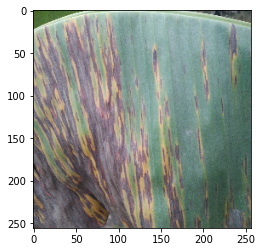

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline

    uploaded = files.upload()

    for fn in uploaded.keys():

      # predicting images
      path = fn
      img = image.load_img(path, target_size=(256,256))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)

      print(fn)
      print(classes)
      # if classes[0,0,0,1]==1:
      #    print('Cordana')
      # elif classes[0,0,1,0]==1:
      #   print('Healthy')
      # elif classes[0,1,0,0]==1:
      #   print('Pestalotiopsis')
      # elif classes[1,0,0,0]==1:
      #   print('Sigatoka')

Saving IMG_20210309_133447.jpg to IMG_20210309_133447.jpg
IMG_20210309_133447.jpg
[[0. 0. 1. 0.]]


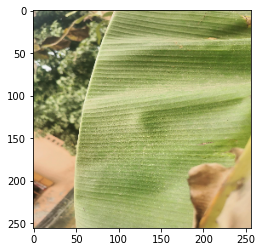

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline

    uploaded = files.upload()

    for fn in uploaded.keys():

      # predicting images
      path = fn
      img = image.load_img(path, target_size=(256,256))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)

      print(fn)
      print(classes)
      # if classes[0,0,0,1]==1:
      #    print('Cordana')
      # elif classes[0,0,1,0]==1:
      #   print('Healthy')
      # elif classes[0,1,0,0]==1:
      #   print('Pestalotiopsis')
      # elif classes[1,0,0,0]==1:
      #   print('Sigatoka')

Saving aug-image-_0_9800.jpeg to aug-image-_0_9800.jpeg
aug-image-_0_9800.jpeg
[[1. 0. 0. 0.]]


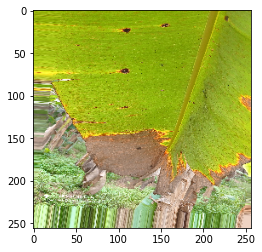

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline

    uploaded = files.upload()

    for fn in uploaded.keys():

      # predicting images
      path = fn
      img = image.load_img(path, target_size=(256,256))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)

      print(fn)
      print(classes)
      # if classes[0,0,0,1]==1:
      #    print('Cordana')
      # elif classes[0,0,1,0]==1:
      #   print('Healthy')
      # elif classes[0,1,0,0]==1:
      #   print('Pestalotiopsis')
      # elif classes[1,0,0,0]==1:
      #   print('Sigatoka')

Saving IMG_20210309_134454.jpg to IMG_20210309_134454.jpg
IMG_20210309_134454.jpg
[[0. 0. 0. 1.]]


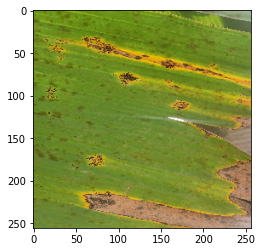

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline

    uploaded = files.upload()

    for fn in uploaded.keys():

      # predicting images
      path = fn
      img = image.load_img(path, target_size=(256,256))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)

      print(fn)
      print(classes)
      # if classes[0,0,0,1]==1:
      #    print('Cordana')
      # elif classes[0,0,1,0]==1:
      #   print('Healthy')
      # elif classes[0,1,0,0]==1:
      #   print('Pestalotiopsis')
      # elif classes[1,0,0,0]==1:
      #   print('Sigatoka')